In [3]:
import sys
sys.path.append("../")
from model_DFormer.builder import EncoderDecoder as DFormer
from models_CMX.builder import EncoderDecoder as CMXmodel
from model_pytorch_deeplab_xception.deeplab import DeepLab
from model_TokenFusion.segformer import WeTr as TokenFusion
from models_segformer import SegFormer
from fvcore.nn import FlopCountAnalysis
import importlib
import torch
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

# code\UsefullnessOfDepth\configs\SynthDet\SynthDet_template_DFormer_Tiny.py
config_path = r"..\configs\SynthDet\SynthDet_template_DFormer_Tiny.py"
config_module = importlib.import_module("configs.SynthDet.SynthDet_template_DFormer_Tiny")
config = config_module.config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")   

rgb_input = torch.randn(2, 3, 400, 400).to(device)
depth_input = torch.randn(2, 1, 400, 400).to(device)

config.decoder = "ham"
config.backbone = "DFormer-Small"
dformer_tiny_model = DFormer(cfg=config).to(device)
flops = FlopCountAnalysis(dformer_tiny_model, (rgb_input, depth_input))
num_params = sum(p.numel() for p in dformer_tiny_model.parameters() if p.requires_grad)
print("Dformer Small flops: ", flops.total())
print("DFormer Small GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("DFormer Small params: ", num_params, " in millions: ", num_params / 1e6)

config.decoder = "ham"
config.backbone = "DFormer-Base"
config.drop_path_rate = 0.2
dformer_large_model = DFormer(cfg=config).to(device)
flops = FlopCountAnalysis(dformer_large_model, (rgb_input, depth_input))
num_params = sum(p.numel() for p in dformer_large_model.parameters() if p.requires_grad)
print("Dformer Base flops: ", flops.total())
print("DFormer Base GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("DFormer Base params: ", num_params, " in millions: ", num_params / 1e6)

config.decoder = "MLPDecoder"
config.backbone = "mit_b1"
cmxmodel = CMXmodel(cfg=config).to(device)
flops = FlopCountAnalysis(cmxmodel, (rgb_input, depth_input))
num_params = sum(p.numel() for p in cmxmodel.parameters() if p.requires_grad)
print("CMX mit_b1 flops: ", flops.total())
print("CMX mit_b1 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("CMX mit_b1 params: ", num_params, " in millions: ", num_params / 1e6)

config.decoder = "MLPDecoder"
config.backbone = "mit_b2"
cmxmodel = CMXmodel(cfg=config).to(device)
flops = FlopCountAnalysis(cmxmodel, (rgb_input, depth_input))
num_params = sum(p.numel() for p in cmxmodel.parameters() if p.requires_grad)
print("CMX mit_b2 flops: ", flops.total())
print("CMX mit_b2 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("CMX mit_b2 params: ", num_params, " in millions: ", num_params / 1e6)

config.backbone = "SegFormer"
segmenter = SegFormer(backbone="MiT-B1", cfg=config, criterion=nn.CrossEntropyLoss(reduction="none")).to(device)
flops = FlopCountAnalysis(segmenter, rgb_input)
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("Segformer MiT-B1 flops: ", flops.total())
print("Segformer MiT-B1 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("Segformer MiT-B1 params: ", num_params, " in millions: ", num_params / 1e6)

config.backbone = "SegFormer"
segmenter = SegFormer(backbone="MiT-B2", cfg=config, criterion=nn.CrossEntropyLoss(reduction="none")).to(device)
flops = FlopCountAnalysis(segmenter, rgb_input)
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("Segformer MiT-B2 flops: ", flops.total())
print("Segformer MiT-B2 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("Segformer MiT-B2 params: ", num_params, " in millions: ", num_params / 1e6)

config.backbone = "mit_b1"
segmenter = TokenFusion(cfg=config, pretrained=False).to(device)
flops = FlopCountAnalysis(segmenter, (rgb_input, depth_input))
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("TokenFusion mit_b1 flops: ", flops.total())
print("TokenFusion mit_b1 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("TokenFusion mit_b1 params: ", num_params, " in millions: ", num_params / 1e6)

config.backbone = "mit_b2"
segmenter = TokenFusion(cfg=config, pretrained=False).to(device)
flops = FlopCountAnalysis(segmenter, (rgb_input, depth_input))
num_params = sum(p.numel() for p in segmenter.parameters() if p.requires_grad)
print("TokenFusion mit_b2 flops: ", flops.total())
print("TokenFusion mit_b2 GFLOPs per image: ", round(flops.total() / 2e9, 1))
print("TokenFusion mit_b2 params: ", num_params, " in millions: ", num_params / 1e6)


24 12:23:47 Using Ham Decoder
24 12:23:47 Initing weights ...


single GPU
0.2
64
spatial True
S 1
D 512
R 64
train_steps 6
eval_steps 7
inv_t 100
eta 0.9
rand_init True


24 12:23:47 WRN Unsupported operator aten::add_ encountered 13 time(s)
24 12:23:47 WRN Unsupported operator aten::gelu encountered 31 time(s)
24 12:23:47 WRN Unsupported operator aten::mul encountered 125 time(s)
24 12:23:47 WRN Unsupported operator aten::add encountered 105 time(s)
24 12:23:47 WRN Unsupported operator aten::rand encountered 35 time(s)
24 12:23:47 WRN Unsupported operator aten::div encountered 48 time(s)
24 12:23:47 WRN Unsupported operator aten::pow encountered 8 time(s)
24 12:23:47 WRN Unsupported operator aten::softmax encountered 9 time(s)
24 12:23:47 WRN Unsupported operator aten::linalg_vector_norm encountered 1 time(s)
24 12:23:47 WRN Unsupported operator aten::clamp_min encountered 1 time(s)
24 12:23:47 WRN Unsupported operator aten::expand_as encountered 1 time(s)
24 12:23:47 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:47 WRN The following submodules of the model were never called during the trace of the graph. They may be unu

Dformer Small flops:  30219436800
DFormer Small GFLOPs per image:  15.1
DFormer Small params:  18759456  in millions:  18.759456
single GPU
0.2
64
spatial True
S 1
D 512
R 64
train_steps 6
eval_steps 7
inv_t 100
eta 0.9
rand_init True


24 12:23:48 WRN Unsupported operator aten::add_ encountered 13 time(s)
24 12:23:48 WRN Unsupported operator aten::gelu encountered 61 time(s)
24 12:23:48 WRN Unsupported operator aten::mul encountered 243 time(s)
24 12:23:48 WRN Unsupported operator aten::add encountered 205 time(s)
24 12:23:48 WRN Unsupported operator aten::rand encountered 75 time(s)
24 12:23:48 WRN Unsupported operator aten::div encountered 88 time(s)
24 12:23:48 WRN Unsupported operator aten::pow encountered 17 time(s)
24 12:23:48 WRN Unsupported operator aten::softmax encountered 18 time(s)
24 12:23:48 WRN Unsupported operator aten::linalg_vector_norm encountered 1 time(s)
24 12:23:48 WRN Unsupported operator aten::clamp_min encountered 1 time(s)
24 12:23:48 WRN Unsupported operator aten::expand_as encountered 1 time(s)
24 12:23:48 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:48 WRN The following submodules of the model were never called during the trace of the graph. They may be u

Dformer Base flops:  47409896192
DFormer Base GFLOPs per image:  23.7
DFormer Base params:  29537152  in millions:  29.537152


24 12:23:49 Using MLP Decoder
24 12:23:49 Initing weights ...
24 12:23:49 WRN Unsupported operator aten::mul encountered 84 time(s)
24 12:23:49 WRN Unsupported operator aten::softmax encountered 24 time(s)
24 12:23:49 WRN Unsupported operator aten::add encountered 60 time(s)
24 12:23:49 WRN Unsupported operator aten::gelu encountered 16 time(s)
24 12:23:49 WRN Unsupported operator aten::bernoulli_ encountered 28 time(s)
24 12:23:49 WRN Unsupported operator aten::div_ encountered 28 time(s)
24 12:23:49 WRN Unsupported operator aten::adaptive_max_pool2d encountered 4 time(s)
24 12:23:49 WRN Unsupported operator aten::sigmoid encountered 8 time(s)
24 12:23:49 WRN Unsupported operator aten::add_ encountered 9 time(s)
24 12:23:49 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:49 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python m

CMX mit_b1 flops:  54737033344
CMX mit_b1 GFLOPs per image:  27.4
CMX mit_b1 params:  44497736  in millions:  44.497736


24 12:23:50 Using MLP Decoder
24 12:23:50 Initing weights ...
24 12:23:51 WRN Unsupported operator aten::mul encountered 132 time(s)
24 12:23:51 WRN Unsupported operator aten::softmax encountered 40 time(s)
24 12:23:51 WRN Unsupported operator aten::add encountered 92 time(s)
24 12:23:51 WRN Unsupported operator aten::gelu encountered 32 time(s)
24 12:23:51 WRN Unsupported operator aten::bernoulli_ encountered 60 time(s)
24 12:23:51 WRN Unsupported operator aten::div_ encountered 60 time(s)
24 12:23:51 WRN Unsupported operator aten::adaptive_max_pool2d encountered 4 time(s)
24 12:23:51 WRN Unsupported operator aten::sigmoid encountered 8 time(s)
24 12:23:51 WRN Unsupported operator aten::add_ encountered 9 time(s)
24 12:23:51 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:51 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python 

CMX mit_b2 flops:  76846170240
CMX mit_b2 GFLOPs per image:  38.4
CMX mit_b2 params:  66587464  in millions:  66.587464
SegFormer with MiT-B1 backbone is created.


24 12:23:51 WRN Unsupported operator aten::mul encountered 22 time(s)
24 12:23:51 WRN Unsupported operator aten::softmax encountered 8 time(s)
24 12:23:51 WRN Unsupported operator aten::add encountered 30 time(s)
24 12:23:51 WRN Unsupported operator aten::gelu encountered 8 time(s)
24 12:23:51 WRN Unsupported operator aten::rand encountered 14 time(s)
24 12:23:51 WRN Unsupported operator aten::floor_ encountered 14 time(s)
24 12:23:51 WRN Unsupported operator aten::div encountered 14 time(s)
24 12:23:51 WRN Unsupported operator aten::add_ encountered 1 time(s)
24 12:23:51 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:51 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
criterion


Segformer MiT-B1 flops:  18245605120
Segformer MiT-B1 GFLOPs per image:  9.1
Segformer MiT-B1 params:  13693696  in millions:  13.693696
SegFormer with MiT-B2 backbone is created.


24 12:23:52 WRN Unsupported operator aten::mul encountered 46 time(s)
24 12:23:52 WRN Unsupported operator aten::softmax encountered 16 time(s)
24 12:23:52 WRN Unsupported operator aten::add encountered 62 time(s)
24 12:23:52 WRN Unsupported operator aten::gelu encountered 16 time(s)
24 12:23:52 WRN Unsupported operator aten::rand encountered 30 time(s)
24 12:23:52 WRN Unsupported operator aten::floor_ encountered 30 time(s)
24 12:23:52 WRN Unsupported operator aten::div encountered 30 time(s)
24 12:23:52 WRN Unsupported operator aten::add_ encountered 1 time(s)
24 12:23:52 WRN Unsupported operator aten::feature_dropout encountered 1 time(s)
24 12:23:52 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
criterion


Segformer MiT-B2 flops:  73349098240
Segformer MiT-B2 GFLOPs per image:  36.7
Segformer MiT-B2 params:  27395840  in millions:  27.39584
Encoder: mit_b1


24 12:23:52 WRN Unsupported operator aten::gelu encountered 64 time(s)
24 12:23:52 WRN Unsupported operator aten::log_softmax encountered 16 time(s)
24 12:23:52 WRN Unsupported operator aten::softmax encountered 33 time(s)
24 12:23:52 WRN Unsupported operator aten::mul encountered 62 time(s)
24 12:23:52 WRN Unsupported operator aten::lt encountered 32 time(s)
24 12:23:52 WRN Unsupported operator aten::add encountered 33 time(s)
24 12:23:52 WRN Unsupported operator aten::bernoulli_ encountered 28 time(s)
24 12:23:52 WRN Unsupported operator aten::div_ encountered 28 time(s)
24 12:23:52 WRN Unsupported operator aten::add_ encountered 3 time(s)
24 12:23:52 WRN Unsupported operator aten::feature_dropout encountered 2 time(s)
24 12:23:52 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though th

TokenFusion mit_b1 flops:  39100867840
TokenFusion mit_b1 GFLOPs per image:  19.6
TokenFusion mit_b1 params:  14968082  in millions:  14.968082
Encoder: mit_b2


24 12:23:54 WRN Unsupported operator aten::gelu encountered 128 time(s)
24 12:23:54 WRN Unsupported operator aten::log_softmax encountered 32 time(s)
24 12:23:54 WRN Unsupported operator aten::softmax encountered 65 time(s)
24 12:23:54 WRN Unsupported operator aten::mul encountered 126 time(s)
24 12:23:54 WRN Unsupported operator aten::lt encountered 64 time(s)
24 12:23:54 WRN Unsupported operator aten::add encountered 65 time(s)
24 12:23:54 WRN Unsupported operator aten::bernoulli_ encountered 60 time(s)
24 12:23:54 WRN Unsupported operator aten::div_ encountered 60 time(s)
24 12:23:54 WRN Unsupported operator aten::add_ encountered 3 time(s)
24 12:23:54 WRN Unsupported operator aten::feature_dropout encountered 2 time(s)
24 12:23:54 WRN The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though 

TokenFusion mit_b2 flops:  64008353536
TokenFusion mit_b2 GFLOPs per image:  32.0
TokenFusion mit_b2 params:  26024594  in millions:  26.024594


Using TrainPre with kwargs:  {'random_mirror': True, 'random_crop_and_scale': True}
True


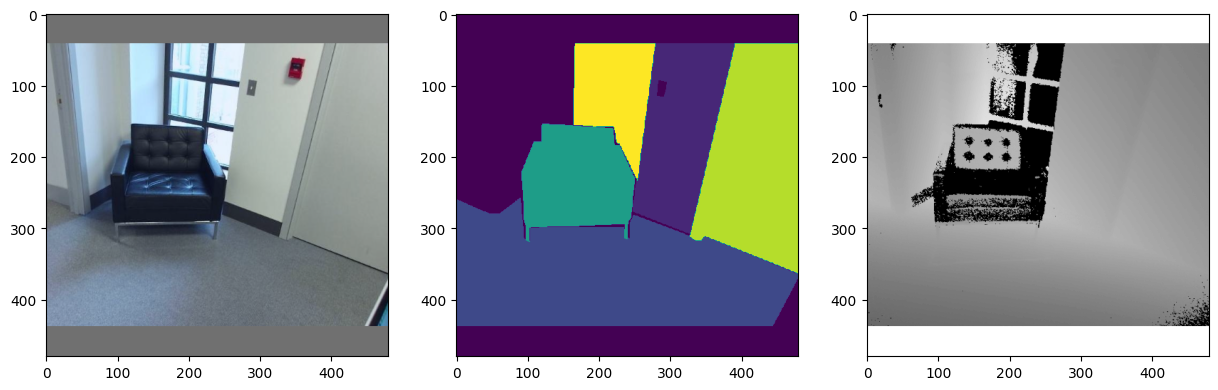

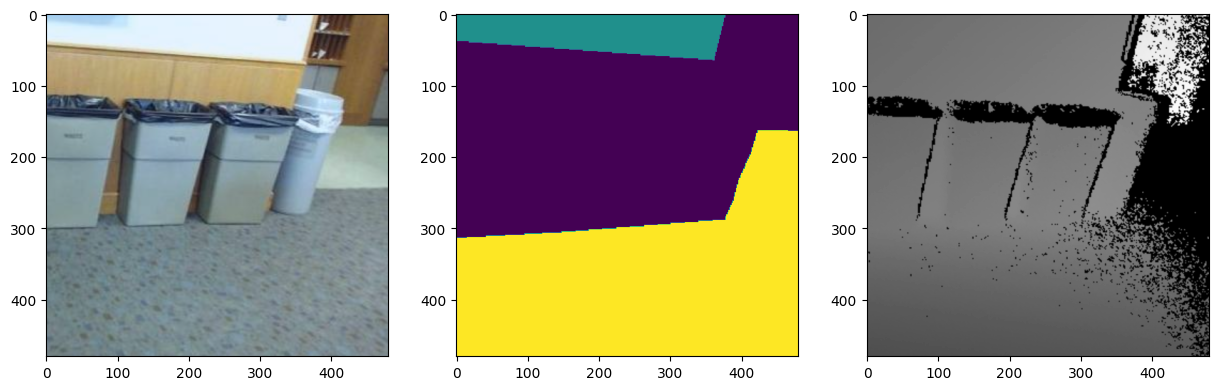

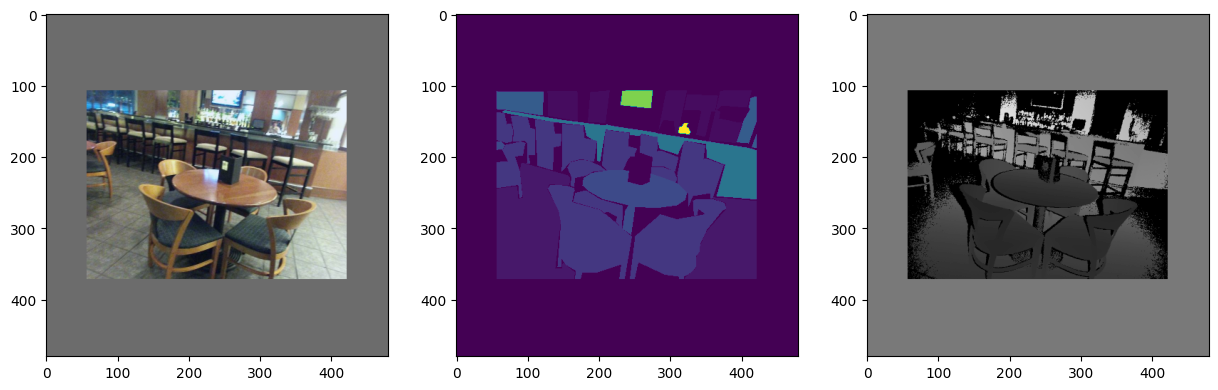

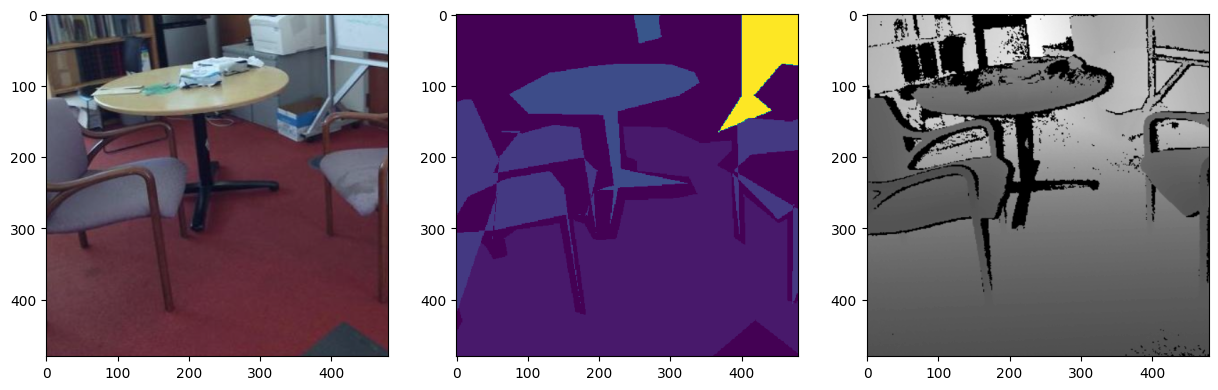

In [1]:
# Utils
import sys
sys.path.append("../")

from utils.dataloader.dataloader import get_train_loader,get_val_loader
from utils.dataloader.RGBXDataset import RGBXDataset
import importlib
import torch
import matplotlib.pyplot as plt

config_module = importlib.import_module("configs.SUNRGBD.SUNRGBD_DFormer_Tiny")
config = config_module.config

config.dataset_path = r"..\datasets\SUNRGBD"
config.rgb_root_folder = r"..\datasets\SUNRGBD\RGB"
config.gt_root_folder = r"..\datasets\SUNRGBD\labels"
config.x_root_folder = r"..\datasets\SUNRGBD\Depth"
config.train_source = r"..\datasets\SUNRGBD\train.txt"
config.eval_source = r"..\datasets\SUNRGBD\test.txt"

train_loader_args = {
    # 'random_noise_rgb': True,
    # 'random_noise_rgb_prob': 0.1,
    # 'random_noise_rgb_amount': 1.0,
    # 'random_black': True,
    # 'random_black_prob': 0.1,
    'random_mirror': True,
    'random_crop_and_scale': True,
}

train_loader, _ = get_train_loader(None, RGBXDataset, config, ** train_loader_args)
val_loader, _ = get_val_loader(None, RGBXDataset, config, 1)

print(train_loader_args.get('random_crop_and_scale', False))

for i, batch in enumerate(train_loader):
    # imgs = minibatch['data']
    #         gts = minibatch['label']
    #         # modal_xs = minibatch['modal_x']
    imgs = batch['data']
    gts = batch['label']
    modal_xs = batch['modal_x'][0]
    img = imgs[0].permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[1].imshow(gts[0])
    ax[2].imshow(modal_xs.permute(1, 2, 0).cpu().numpy(), cmap='gray')
    plt.show()

    if i == 3:
        break
    
